In [57]:
import pandas as pd
from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

In [58]:
df = pd.read_csv("row_size25_vector_size8000.csv")

In [59]:
#df = df * 1000
df

,time_change,x_change,y_change,z_change,phi_change,theta_change,psi_change,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,...,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23,gyroscope_reading_psi_24
0,0.75,0.095414,7.831732e-04,-1.830826e-02,0.000004,-1.899489e-05,8.611218e-04,-0.698110,0.590438,-0.257626,...,-8.800719e-03,5.298978e-03,9.884372e-03,-3.184273e-03,-2.997938e-03,1.894689e-02,9.907016e-04,1.828426e-03,1.944754e-03,-8.585624e-03
1,0.75,0.014835,6.554644e-08,-5.668671e-07,-0.000100,9.376077e-11,1.925615e-08,-0.099453,0.061359,-0.033114,...,-1.121775e-07,-5.435572e-09,1.052373e-07,-4.481473e-08,-1.186664e-07,2.082948e-07,-1.504837e-07,1.285739e-07,-1.430876e-07,5.696639e-08
2,0.75,0.038542,-4.253019e-02,-1.324112e+00,-0.000565,5.260375e-04,-9.803592e-04,-0.388588,0.290145,-0.155464,...,1.068992e-04,7.679180e-04,-5.237463e-03,5.592948e-03,7.299841e-03,2.906117e-03,-7.231721e-03,6.324463e-03,-4.747468e-03,1.577196e-03
3,0.75,0.089380,8.486856e-02,2.985025e-03,0.000001,1.303843e-06,1.148772e-07,-1.071640,0.640420,-0.366004,...,2.090921e-02,-1.416385e-07,5.078921e-07,2.017139e-07,-6.800039e-07,8.511061e-07,-6.071061e-07,4.289079e-07,-6.729327e-07,1.772654e-07
4,0.75,-0.000740,-7.529482e-03,1.489150e-03,-0.000005,2.239492e-05,2.292067e-06,-0.002145,0.001609,0.000911,...,-1.160497e-05,9.331902e-06,-2.339698e-07,7.108546e-06,-1.142023e-05,4.342353e-06,1.276205e-06,-2.418973e-07,1.514210e-05,-1.567425e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.75,0.080613,-5.670724e-02,3.395028e-03,-0.000898,5.510571e-04,-1.511662e-08,0.344549,-0.178680,-0.254628,...,-2.722174e-08,1.567872e-07,4.718872e-07,-6.411936e-07,5.316456e-08,-2.072972e-07,6.010984e-07,3.187830e-07,-1.177266e-06,5.136813e-07
7996,0.75,-0.031717,8.451793e-02,5.029793e-01,0.000211,5.391571e-05,-4.915356e-03,-1.138212,0.000950,0.150669,...,5.501784e-04,5.484273e-04,5.466180e-04,1.634981e-02,-4.029324e-03,-1.339013e-02,-3.539107e-03,4.474886e-03,-2.388719e-02,-1.702367e-03
7997,0.75,-0.048495,-5.835063e-02,9.999901e-03,0.000474,5.505674e-04,-8.582078e-08,0.356305,-0.119151,-0.078508,...,-7.178587e-07,5.506110e-07,-7.084310e-07,3.341495e-07,6.664534e-07,1.663469e-02,-4.313218e-07,6.903582e-07,-6.139961e-07,-2.495332e-07
7998,0.75,0.001300,6.367301e-03,-2.180824e-03,0.000004,-1.811738e-05,4.211093e-12,-0.007634,-0.005119,0.004320,...,-1.241202e-10,-1.330370e-10,3.279835e-10,-8.055880e-12,-1.425668e-11,-1.963447e-10,-1.917192e-10,7.692665e-11,3.229322e-10,-1.307682e-10


In [60]:
X = df.iloc[:,7:]




#X = df[['accelerometer_reading_x_0','accelerometer_reading_y_0','accelerometer_reading_z_0','gyroscope_reading_phi_0','gyroscope_reading_theta_0','gyroscope_reading_psi_0']]
#t = df[['linear_position_x','linear_position_y','linear_position_z','angular_position_phi','angular_position_theta','angular_position_psi']]

#t = df[['phi_change','theta_change','psi_change']]
#t = df[['phi_change']]

t = df[['theta_change']]
#t = df[['psi_change']]

In [61]:
X


,accelerometer_reading_x_0,accelerometer_reading_x_1,accelerometer_reading_x_2,accelerometer_reading_x_3,accelerometer_reading_x_4,accelerometer_reading_x_5,accelerometer_reading_x_6,accelerometer_reading_x_7,accelerometer_reading_x_8,accelerometer_reading_x_9,...,gyroscope_reading_psi_15,gyroscope_reading_psi_16,gyroscope_reading_psi_17,gyroscope_reading_psi_18,gyroscope_reading_psi_19,gyroscope_reading_psi_20,gyroscope_reading_psi_21,gyroscope_reading_psi_22,gyroscope_reading_psi_23,gyroscope_reading_psi_24
0,-0.698110,0.590438,-0.257626,0.125631,-0.062696,0.595336,-0.444826,-0.540315,0.388053,0.062870,...,-8.800719e-03,5.298978e-03,9.884372e-03,-3.184273e-03,-2.997938e-03,1.894689e-02,9.907016e-04,1.828426e-03,1.944754e-03,-8.585624e-03
1,-0.099453,0.061359,-0.033114,0.028247,-0.017658,0.072462,-0.123457,0.070925,0.073482,-0.144182,...,-1.121775e-07,-5.435572e-09,1.052373e-07,-4.481473e-08,-1.186664e-07,2.082948e-07,-1.504837e-07,1.285739e-07,-1.430876e-07,5.696639e-08
2,-0.388588,0.290145,-0.155464,0.318173,-0.256355,0.028242,0.130538,-0.202318,0.211144,-0.068916,...,1.068992e-04,7.679180e-04,-5.237463e-03,5.592948e-03,7.299841e-03,2.906117e-03,-7.231721e-03,6.324463e-03,-4.747468e-03,1.577196e-03
3,-1.071640,0.640420,-0.366004,0.212364,0.598898,-0.598849,-0.511024,1.131753,-0.530478,-0.223965,...,2.090921e-02,-1.416385e-07,5.078921e-07,2.017139e-07,-6.800039e-07,8.511061e-07,-6.071061e-07,4.289079e-07,-6.729327e-07,1.772654e-07
4,-0.002145,0.001609,0.000911,-0.001406,0.001540,-0.008721,0.011719,-0.001178,-0.010470,0.010265,...,-1.160497e-05,9.331902e-06,-2.339698e-07,7.108546e-06,-1.142023e-05,4.342353e-06,1.276205e-06,-2.418973e-07,1.514210e-05,-1.567425e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.344549,-0.178680,-0.254628,0.254226,0.596655,-3.600011,3.001758,-0.625824,0.498295,0.390806,...,-2.722174e-08,1.567872e-07,4.718872e-07,-6.411936e-07,5.316456e-08,-2.072972e-07,6.010984e-07,3.187830e-07,-1.177266e-06,5.136813e-07
7996,-1.138212,0.000950,0.150669,-0.097780,-0.101460,-0.030136,1.282194,0.000000,-1.169728,-0.596613,...,5.501784e-04,5.484273e-04,5.466180e-04,1.634981e-02,-4.029324e-03,-1.339013e-02,-3.539107e-03,4.474886e-03,-2.388719e-02,-1.702367e-03
7997,0.356305,-0.119151,-0.078508,-0.045521,0.314906,-0.230252,-0.070506,-0.219769,0.501185,-0.201123,...,-7.178587e-07,5.506110e-07,-7.084310e-07,3.341495e-07,6.664534e-07,1.663469e-02,-4.313218e-07,6.903582e-07,-6.139961e-07,-2.495332e-07
7998,-0.007634,-0.005119,0.004320,0.004603,-0.004140,0.022927,0.006595,0.002951,-0.009726,0.005135,...,-1.241202e-10,-1.330370e-10,3.279835e-10,-8.055880e-12,-1.425668e-11,-1.963447e-10,-1.917192e-10,7.692665e-11,3.229322e-10,-1.307682e-10


In [62]:
X.shape

(8000, 150)

In [63]:
in_dim = X.shape[1]
out_dim = t.shape[1]

In [64]:
in_dim

150

In [65]:
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)

In [66]:
t_train.shape

(6400, 1)

In [67]:
model = Sequential()
model.add(Dense(256, input_dim=in_dim, activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(32, activation="sigmoid"))
model.add(Dense(out_dim))
#model.compile(loss="mse", optimizer="adam")
model.compile(loss="mse", optimizer="sgd")

In [68]:
#optimizer = keras.optimizers.Adam()
#lr_metric = get_lr_metric(optimizer)

#model.compile(
#    optimizer=optimizer,
#    metrics=['accuracy', lr_metric],
#    loss='mean_absolute_error', 
#    )

In [69]:
#model.evaluate(X_train, t_train, batch_size=12, verbose=2)

In [70]:
model.fit(X_train, t_train, epochs=200, batch_size=12, verbose=2, validation_split=0.4)

Epoch 1/200
320/320 - 1s - loss: 0.0111 - val_loss: 1.4869e-05
Epoch 2/200
320/320 - 1s - loss: 1.5627e-05 - val_loss: 1.5020e-05
Epoch 3/200
320/320 - 1s - loss: 1.5574e-05 - val_loss: 1.4777e-05
Epoch 4/200
320/320 - 1s - loss: 1.5545e-05 - val_loss: 1.5043e-05
Epoch 5/200
320/320 - 1s - loss: 1.5516e-05 - val_loss: 1.4723e-05
Epoch 6/200
320/320 - 1s - loss: 1.5467e-05 - val_loss: 1.4771e-05
Epoch 7/200
320/320 - 1s - loss: 1.5416e-05 - val_loss: 1.4803e-05
Epoch 8/200
320/320 - 1s - loss: 1.5356e-05 - val_loss: 1.4963e-05
Epoch 9/200
320/320 - 1s - loss: 1.5180e-05 - val_loss: 1.4677e-05
Epoch 10/200
320/320 - 1s - loss: 1.5257e-05 - val_loss: 1.4466e-05
Epoch 11/200
320/320 - 1s - loss: 1.5101e-05 - val_loss: 1.4579e-05
Epoch 12/200
320/320 - 1s - loss: 1.5147e-05 - val_loss: 1.4676e-05
Epoch 13/200
320/320 - 1s - loss: 1.5050e-05 - val_loss: 1.4645e-05
Epoch 14/200
320/320 - 1s - loss: 1.5034e-05 - val_loss: 1.4272e-05
Epoch 15/200
320/320 - 1s - loss: 1.4958e-05 - val_loss: 1.42

Epoch 122/200
320/320 - 1s - loss: 1.0995e-05 - val_loss: 1.0675e-05
Epoch 123/200
320/320 - 1s - loss: 1.0965e-05 - val_loss: 1.0707e-05
Epoch 124/200
320/320 - 1s - loss: 1.0918e-05 - val_loss: 1.0663e-05
Epoch 125/200
320/320 - 1s - loss: 1.0956e-05 - val_loss: 1.0599e-05
Epoch 126/200
320/320 - 1s - loss: 1.0911e-05 - val_loss: 1.0623e-05
Epoch 127/200
320/320 - 1s - loss: 1.0847e-05 - val_loss: 1.0589e-05
Epoch 128/200
320/320 - 1s - loss: 1.0865e-05 - val_loss: 1.0547e-05
Epoch 129/200
320/320 - 1s - loss: 1.0765e-05 - val_loss: 1.0501e-05
Epoch 130/200
320/320 - 1s - loss: 1.0828e-05 - val_loss: 1.0648e-05
Epoch 131/200
320/320 - 1s - loss: 1.0769e-05 - val_loss: 1.0453e-05
Epoch 132/200
320/320 - 1s - loss: 1.0699e-05 - val_loss: 1.0430e-05
Epoch 133/200
320/320 - 1s - loss: 1.0664e-05 - val_loss: 1.0425e-05
Epoch 134/200
320/320 - 1s - loss: 1.0662e-05 - val_loss: 1.0576e-05
Epoch 135/200
320/320 - 1s - loss: 1.0673e-05 - val_loss: 1.0374e-05
Epoch 136/200
320/320 - 1s - loss:

In [73]:
ypred = model.predict(X_test)
print("y1 RMSE: ", (np.sqrt(mean_squared_error(t_test.iloc[:, 0], ypred[:,0]))))

y1 RMSE:  0.002869643654415688


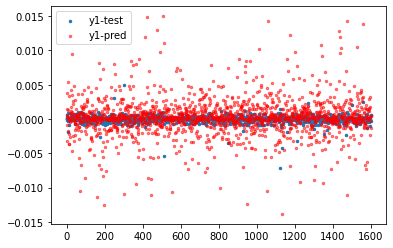

In [74]:
x_ax = range(len(X_test))

plt.scatter(x_ax, t_test.iloc[:, 0],  s=6, label="y1-test")
plt.scatter(x_ax, ypred[:,0],s = 6, label="y1-pred",c="red",alpha = 0.5)

plt.legend()
plt.show()

In [75]:
np.argsort(t_test.iloc[:, 0])

6013    1122
4468     510
5332    1133
2088     849
161     1213
        ... 
1723    1499
4110    1270
2441    1559
2447     251
504      300
Name: theta_change, Length: 1600, dtype: int64

In [76]:
ypred

array([[ 0.00147011],
       [ 0.00384412],
       [ 0.0005719 ],
       ...,
       [-0.00133929],
       [ 0.00050738],
       [ 0.00048532]], dtype=float32)

In [77]:
t_test

,theta_change
6013,-2.894009e-08
4468,1.663721e-04
5332,-1.423637e-04
2088,6.217456e-04
161,7.022828e-05
...,...
1723,-3.176790e-06
4110,-2.009336e-04
2441,6.518390e-04
2447,-2.140201e-04


In [78]:
y_test_index = np.argsort(t_test.iloc[:, 0], axis=0).to_numpy()
#print(t_test.iloc[y_test_index])
print(t_test.iloc[y_test_index[0]].to_numpy()[0], t_test.iloc[y_test_index[-1]].to_numpy()[0])

-0.007144636709437099 0.0049770559966939


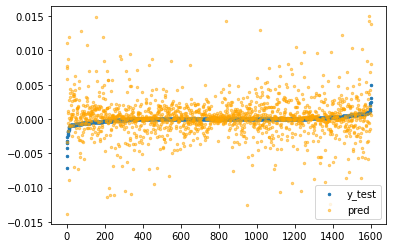

In [79]:
x_ax = range(len(X_test))

y_test_index = np.argsort(t_test.iloc[:, 0], axis=0).to_numpy()

plt.scatter(x_ax, t_test.iloc[y_test_index],  s=6, label="y_test")
plt.scatter(x_ax, ypred[y_test_index], s=6, label="pred",c="orange", alpha=0.5)
#plt.ylim(t_test.iloc[y_test_index[0]].to_numpy()[0])
plt.legend()
plt.show()